# Prereqs

In [ ]:
import csv
import locale
from collections import defaultdict
locale.getpreferredencoding = lambda: "UTF-8"

!pip install git+https://github.com/VlegelsJamie/audiocraft.git git+https://github.com/kkoutini/passt_hear21.git
!wget https://raw.githubusercontent.com/qiuqiangkong/audioset_tagging_cnn/master/metadata/class_labels_indices.csv

import torch
import torchaudio
from audiocraft.models import musicgen
from audiocraft.utils.notebook import display_audio
from hear21passt.base import load_model
import inspect

model = musicgen.MusicGen.get_pretrained('small', device='cuda')
print(model.lm)

classifier = load_model(mode="logits").cuda()

filename = "./class_labels_indices.csv"

# Load
labels = []
with open(filename, "r") as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        labels.append(row["display_name"])

# Mount to drive so we can access our own files
from google.colab import drive
drive.mount('/content/drive')

  Cloning https://github.com/VlegelsJamie/audiocraft.git to /tmp/pip-req-build-fai_uqck
  Running command git clone --filter=blob:none --quiet https://github.com/VlegelsJamie/audiocraft.git /tmp/pip-req-build-fai_uqck
  Resolved https://github.com/VlegelsJamie/audiocraft.git to commit 01866224970ca8ac8df0bd1b72266fe1fdac3716
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/kkoutini/passt_hear21.git to /tmp/pip-req-build-l_40e0px
  Running command git clone --filter=blob:none --quiet https://github.com/kkoutini/passt_hear21.git /tmp/pip-req-build-l_40e0px
  Resolved https://github.com/kkoutini/passt_hear21.git to commit bb270d3460e4f712bb6f769d5463ad6ef3a128f5
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 11.3 MB/s eta 0:00:00
  Installing build dependenc

--2023-06-29 13:44:17--  https://raw.githubusercontent.com/qiuqiangkong/audioset_tagging_cnn/master/metadata/class_labels_indices.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14675 (14K) [text/plain]
Saving to: ‘class_labels_indices.csv’

class_labels_indice 100%[===================>]  14.33K  --.-KB/s    in 0.001s  

2023-06-29 13:44:17 (21.3 MB/s) - ‘class_labels_indices.csv’ saved [14675/14675]



LMModel(
  (cfg_dropout): ClassifierFreeGuidanceDropout(p=0.3)
  (att_dropout): AttributeDropout({})
  (condition_provider): ConditioningProvider(
    (conditioners): ModuleDict(
      (description): T5Conditioner(
        (output_proj): Linear(in_features=768, out_features=1024, bias=True)
      )
    )
  )
  (fuser): ConditionFuser()
  (emb): ModuleList(
    (0-3): 4 x ScaledEmbedding(2049, 1024)
  )
  (transformer): StreamingTransformer(
    (layers): ModuleList(
      (0-23): 24 x StreamingTransformerLayer(
        (self_attn): StreamingMultiheadAttention(
          (out_proj): Linear(in_features=1024, out_features=1024, bias=False)
        )
        (linear1): Linear(in_features=1024, out_features=4096, bias=False)
        (dropout): Dropout(p=0.0, inplace=False)
        (linear2): Linear(in_features=4096, out_features=1024, bias=False)
        (norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  

Downloading: "https://github.com/kkoutini/PaSST/releases/download/v0.0.1-audioset/passt-s-f128-p16-s10-ap.476-swa.pt" to /root/.cache/torch/hub/checkpoints/passt-s-f128-p16-s10-ap.476-swa.pt


PaSST(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
     

# Generate Dataset

In [ ]:
model.set_generation_params(duration=8, use_sampling=True)
guitar_desc = [
    '320kbps 48khz rock with saturated guitars, a heavy bass line and crazy drum break and fills',
    '320kbps 48khz classic reggae track with an electronic guitar solo',
    'lofi slow bpm electro chill with electric guitar',
    '320kbps 48khz acoustic guitar singer songwriter song',
    '320kbps 48khz guitar trio, jazz standard',
    '320kbps 48khz epic 70s guitar solo, flanger, chorus',
    '320kbps 48khz funky guitar groove',
    '320kbps 48khz a piano and guitar duet playing latin music',
    '320kpbs 48khz a light and cheerly guitar track',
    '320kbps 48khz pop track with catchy guitar melodies'
]

non_guitar_desc = [
    '320kbps 48khz bebop jazz with piano, drums and upright bass',
    '320kbps 48khz reggae with hammond organ',
    'lofi slow bpm electro chill with piano',
    '320kbps 48khz violins and synths that inspire awe at the finiteness of life and the universe',
    '320kbps 48khz smooth jazz, with a saxophone solo, piano chords, and snare full drums',
    '320kbps 48khz piano trio, jazz standard',
    '320kbps 48khz funk-soul rhodes groove',
    '320kbps 48khz a piano and cello duet playing a sad chambers music',
    '320kpbs 48khz a light and cheerly EDM track, with syncopated drums, aery pads, and strong emotions',
    '320kbps 48khz pop dance track with catchy flute melodies, tropical percussion, and upbeat rhythms, perfect for the beach'
  ]

In [ ]:
violin_desc = [
    "320kbps 48khz A magical fairy composition with a nice violin melody.",
    "320kbps 48khz Irish folk music with a traditional fiddle.",
    "320kbps 48khz A cheerful tune with a violin.",
    "A crisp violin melody on a lofi beat",
    "320kbps 48khz Upbeat jazz music featuring lively violin.",
    "320kbps 48khz A beautiful violin melody",
    "320kbps 48khz Upbeat country band fiddle solo",
    "320kbps 48khz A fun children's violin song",
    "320kbps 48khz An emotional violin solo acompanied by a piano",
    "320kbps 48khz A beautiful violin melody"
]

non_violin_desc = [
    "320kbps 48khz A cheerful tune floating in the air.",
    "320kbps 48khz A haunting melody",
    "320kbps 48khz Upbeat jazz music featuring lively guitar",
    "320kbps 48khz Relaxing music with a soothing piano",
    "320kbps 48khz A magical fairy flute composition",
    "320kbps 48khz Modern beat with a guitar",
    "320kbps 48khz A singer-songwriter song with a guitar solo",
    '320kbps 48khz smooth jazz, with a saxophone solo, piano chords, and snare full drums',
    '320kbps 48khz funky guitar groove',
    'lofi slow bpm electro chill with piano'
]

# Observational Analysis (Logit Lens)

## Activation Extraction

In [ ]:
def get_activations_for_dataset(model, desc: list):
    # Create a list of dictionaries to store the activations of each sample.
    activations = []

    def reset_activations():
        # Reset the activations for a new sample.
        activations.append({'self_attention': defaultdict(list), 'cross_attention': defaultdict(list),
                            'mlp': defaultdict(list)})

    def self_attention_hook_fn(layer_id):
        def hook(module, input, output):
            # Store the output tensor and the module name.
            activations[-1]['self_attention'][layer_id].append(output.detach())
        return hook

    def cross_attention_hook_fn(layer_id):
        def hook(module, input, output):
            # Store the output tensor and the module name.
            activations[-1]['cross_attention'][layer_id].append(output.detach())
        return hook

    def mlp_hook_fn(layer_id):
        def hook(module, input, output):
            # Store the output tensor and the module name.
            activations[-1]['mlp'][layer_id].append(output.detach())
        return hook

    # Register the hooks.
    for i, layer in enumerate(model.lm.transformer.layers):
        layer.self_attn.out_proj.register_forward_hook(self_attention_hook_fn(i))
        layer.cross_attention.out_proj.register_forward_hook(cross_attention_hook_fn(i))
        layer.linear2.register_forward_hook(mlp_hook_fn(i))

    # Go through your dataset and compute the forward passes.
    res = []
    for d in desc:
        reset_activations()
        torch.manual_seed(42)
        res.append(model.generate([d])[0])

    # Unregister the hooks to make sure they don't interfere with the next dataset.
    for i, layer in enumerate(model.lm.transformer.layers):
        layer.self_attn.out_proj._forward_hooks.clear()
        layer.cross_attention.out_proj._forward_hooks.clear()
        layer.linear2._forward_hooks.clear()

    return res, activations


# Use the function for your datasets.
guitar_res, activations_guitar = get_activations_for_dataset(model, guitar_desc)
non_guitar_res, activations_non_guitar = get_activations_for_dataset(model, non_guitar_desc)

violin_res, activations_violin = get_activations_for_dataset(model, violin_desc)
non_violin_res, activations_non_violin = get_activations_for_dataset(model, non_violin_desc)

## Compute Mean Activations For Each Dataset

In [ ]:
def get_mean_activations(activations):
    result = defaultdict(lambda: defaultdict(list))

    for dictionary in activations:
        for outer_key, outer_value in dictionary.items():
            for inner_key, inner_value in outer_value.items():
                result[outer_key][inner_key].append(inner_value)

    mean_activations = {outer_key: {inner_key: [sum(values) / len(values) for values in zip(*inner_values)]
                            for inner_key, inner_values in outer_value.items()}
                for outer_key, outer_value in result.items()}

    return mean_activations

mean_activations_guitar = get_mean_activations(activations_guitar)
mean_activations_non_guitar = get_mean_activations(activations_non_guitar)

mean_activations_violin = get_mean_activations(activations_violin)
mean_activations_non_violin = get_mean_activations(activations_non_violin)

## Display Dataset

In [ ]:
def generate_sample_logits(results, instrument_idx):
    all_logits = []
    for r in results:
        logits = classifier(r)
        all_logits.append(logits.squeeze()[instrument_idx].item())

    return all_logits

guitar_sample_logits = generate_sample_logits(guitar_res, 140)
non_guitar_sample_logits = generate_sample_logits(non_guitar_res, 140)

violin_sample_logits = generate_sample_logits(violin_res, 191)
non_violin_sample_logits = generate_sample_logits(non_violin_res, 191)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:641: UserWarning: stft with return_complex=False is deprecated. In a future pytorch release, stft will return complex tensors for all inputs, and return_complex=False will raise an error.
Note: you can still call torch.view_as_real on the complex output to recover the old return format. (Triggered internally at ../aten/src/ATen/native/SpectralOps.cpp:862.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/hear21passt/models/passt.py:292: UserWarning: Input image size (128*800) doesn't match model (128*998).
  warnings.warn(f"Input image size ({H}*{W}) doesn't match model ({self.img_size[0]}*{self.img_size[1]}).")


x torch.Size([1, 1, 128, 800])
self.norm(x) torch.Size([1, 768, 12, 79])
 patch_embed :  torch.Size([1, 768, 12, 79])
 self.time_new_pos_embed.shape torch.Size([1, 768, 1, 99])
 CUT time_new_pos_embed.shape torch.Size([1, 768, 1, 79])
 self.freq_new_pos_embed.shape torch.Size([1, 768, 12, 1])
X flattened torch.Size([1, 948, 768])
 self.new_pos_embed.shape torch.Size([1, 2, 768])
 self.cls_tokens.shape torch.Size([1, 1, 768])
 self.dist_token.shape torch.Size([1, 1, 768])
 final sequence x torch.Size([1, 950, 768])
 after 12 atten blocks x torch.Size([1, 950, 768])
forward_features torch.Size([1, 768])
head torch.Size([1, 527])


## Generate Class Logits from Activations From Individual Modules

In [ ]:
def calculate_module_logits(model, classifier, mean_activations, description, instrument_idx):
    module_logits = {'self_attention': [], 'cross_attention': [], 'mlp': []}

    for mod_type in mean_activations.keys():
        for layer in mean_activations[mod_type].keys():
            logit_sequence = mean_activations[mod_type][layer]
            torch.manual_seed(42)
            r = model.generate([description[0]], external_logits=logit_sequence)[0]
            logits = classifier(r)
            module_logits[mod_type].append(logits.squeeze()[instrument_idx].item())

    return module_logits


def calculate_module_logit_difference(intrument_logits, non_instrument_logits):
    logit_difference = {'self_attention': [], 'cross_attention': [], 'mlp': []}

    for key in intrument_logits.keys():
        logit_difference[key] = [i - ni for i, ni in zip(intrument_logits[key], non_instrument_logits[key])]

    return logit_difference

guitar_module_logits = calculate_module_logits(model, classifier, mean_activations_guitar, guitar_desc, 140)
non_guitar_module_logits = calculate_module_logits(model, classifier, mean_activations_non_guitar, non_guitar_desc, 140)
guitar_logit_module_difference = calculate_module_logit_difference(guitar_module_logits, non_guitar_module_logits)

violin_module_logits = calculate_module_logits(model, classifier, mean_activations_violin, violin_desc, 191)
non_violin_module_logits = calculate_module_logits(model, classifier, mean_activations_non_violin, non_violin_desc, 191)
violin_logit_module_difference = calculate_module_logit_difference(violin_module_logits, non_violin_module_logits)

## Plot Logit Difference Heatmap

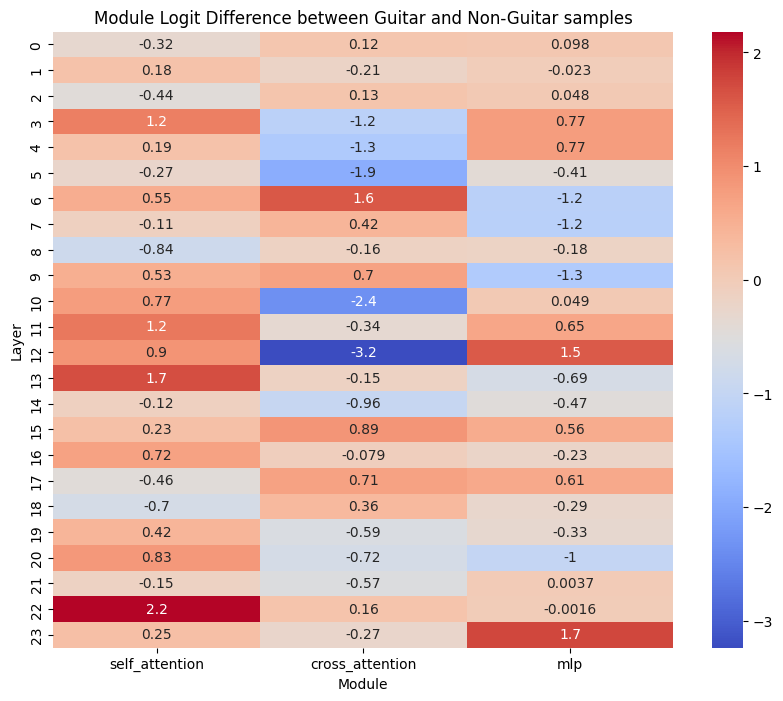

<Figure size 640x480 with 0 Axes>

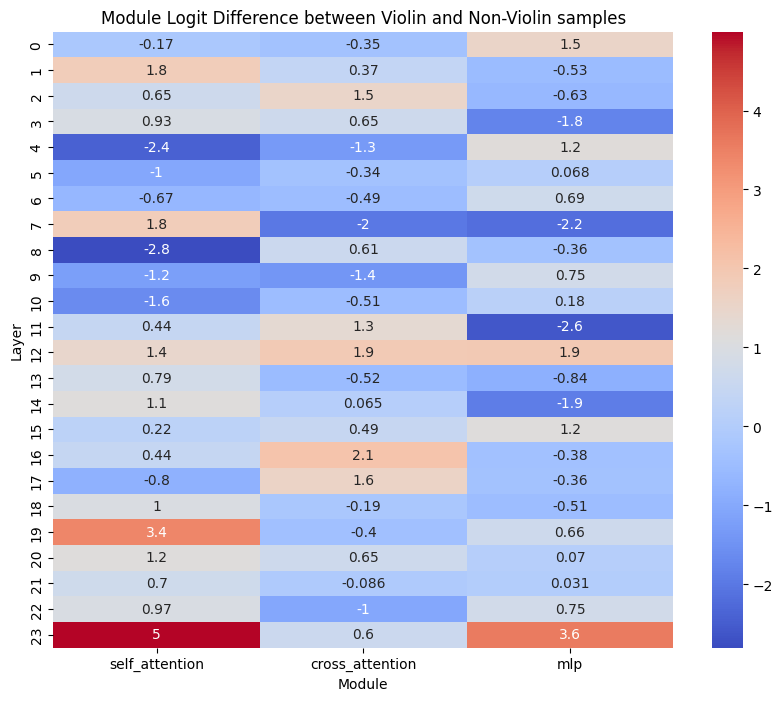

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert dictionary to dataframe
df = pd.DataFrame(guitar_logit_module_difference)
# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df, cmap='coolwarm', annot=True)
plt.title('Module Logit Difference between Guitar and Non-Guitar samples')
plt.xlabel('Module')
plt.ylabel('Layer')
plt.savefig('/content/drive/My Drive/Colab Notebooks/MusicGen/Module_Logit_Difference_Guitar.pdf', format='pdf')
plt.show()
plt.clf()

# Convert dictionary to dataframe
df = pd.DataFrame(violin_logit_module_difference)
# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df, cmap='coolwarm', annot=True)
plt.title('Module Logit Difference between Violin and Non-Violin samples')
plt.xlabel('Module')
plt.ylabel('Layer')
plt.savefig('/content/drive/My Drive/Colab Notebooks/MusicGen/Module_Logit_Difference_Violon.pdf', format='pdf')
plt.show()
plt.clf()

# Causal Intervention (Interchange Ablation)

In [ ]:
from functools import partial

class ActivationIterator:
    def __init__(self, activations):
        self.activations = activations
        self.counter = 0

    def get_next_activation(self):
        # Get the next activation.
        activation = self.activations[self.counter]
        # Increment the counter.
        self.counter += 1
        return activation


def inject_activation_hook_fn(activation_iterator, module, input, output):
    # Replace the output with the next activation from the ActivationIterator.
    return activation_iterator.get_next_activation()

In [ ]:
def compute_ablation_logit_diffs(model, classifier, descriptions, sample_logits, mean_activations_non_instrument, instrument_idx):
    ablation_logits_diff = []
    for des_i, des in enumerate(descriptions):
        ablation_logits_diff.append({'self_attention': [], 'cross_attention': [], 'mlp': []})
        for mod_type in ablation_logits_diff[0].keys():
            for i, layer in enumerate(model.lm.transformer.layers):
                # Instantiate the ActivationIterator with the list of activations.
                activation_iterator = ActivationIterator(mean_activations_non_instrument[mod_type][i])

                hook_fn = partial(inject_activation_hook_fn, activation_iterator)

                if mod_type == "self_attention":
                    layer.self_attn.out_proj.register_forward_hook(hook_fn)
                elif mod_type == "cross_attention":
                    layer.cross_attention.out_proj.register_forward_hook(hook_fn)
                else:
                    layer.linear2.register_forward_hook(hook_fn)

                torch.manual_seed(42)
                r_ablate = model.generate([des])[0]
                logits_ablate = classifier(r_ablate)
                logits_ablate = logits_ablate.squeeze()[instrument_idx].item()

                logit_diff = sample_logits[des_i] - logits_ablate
                ablation_logits_diff[-1][mod_type].append(logit_diff)

                if mod_type == "self_attention":
                    layer.self_attn.out_proj._forward_hooks.clear()
                elif mod_type == "cross_attention":
                    layer.cross_attention.out_proj._forward_hooks.clear()
                else:
                    layer.linear2._forward_hooks.clear()

    return ablation_logits_diff


def compute_avg_logit_diff(ablation_logit_diff):
    # create a defaultdict to accumulate sum and counts
    avg_logits_diff = defaultdict(lambda: defaultdict(int))

    for d in ablation_logit_diff:
        for k, v in d.items():
            for i, num in enumerate(v):
                avg_logits_diff[k][i] += num

    # calculate average
    avg_logits_diff = {k: [sum / len(ablation_logit_diff) for sum in v.values()] for k, v in avg_logits_diff.items()}

    return avg_logits_diff


guitar_ablation_logits_diff = compute_ablation_logit_diffs(model, classifier, guitar_desc, guitar_sample_logits, mean_activations_non_guitar, 140)
violin_ablation_logits_diff = compute_ablation_logit_diffs(model, classifier, violin_desc, violin_sample_logits, mean_activations_non_violin, 191)

mean_guitar_ablation_logits_diff = compute_avg_logit_diff(guitar_ablation_logits_diff)
mean_violin_ablation_logits_diff = compute_avg_logit_diff(violin_ablation_logits_diff)

/usr/local/lib/python3.10/dist-packages/hear21passt/models/passt.py:292: UserWarning: Input image size (128*800) doesn't match model (128*998).
  warnings.warn(f"Input image size ({H}*{W}) doesn't match model ({self.img_size[0]}*{self.img_size[1]}).")


In [ ]:
import json

with open('/content/drive/My Drive/Colab Notebooks/MusicGen/mean_guitar_ablation_logits_diff.json', 'w') as f:
    # Use json.dump to write the dictionary to the file
    json.dump(mean_guitar_ablation_logits_diff, f)

with open('/content/drive/My Drive/Colab Notebooks/MusicGen/mean_violin_ablation_logits_diff.json', 'w') as f:
    # Use json.dump to write the dictionary to the file
    json.dump(mean_violin_ablation_logits_diff, f)

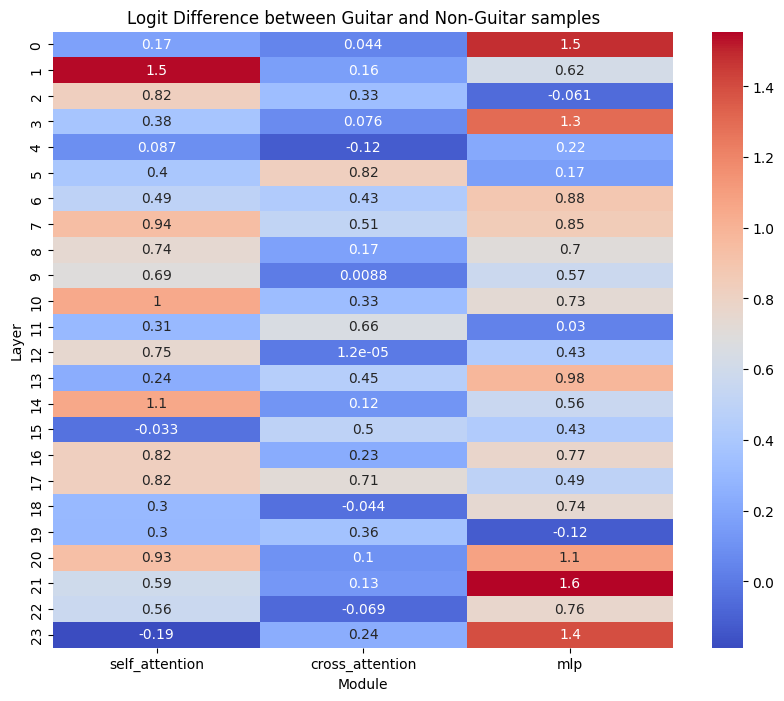

<Figure size 640x480 with 0 Axes>

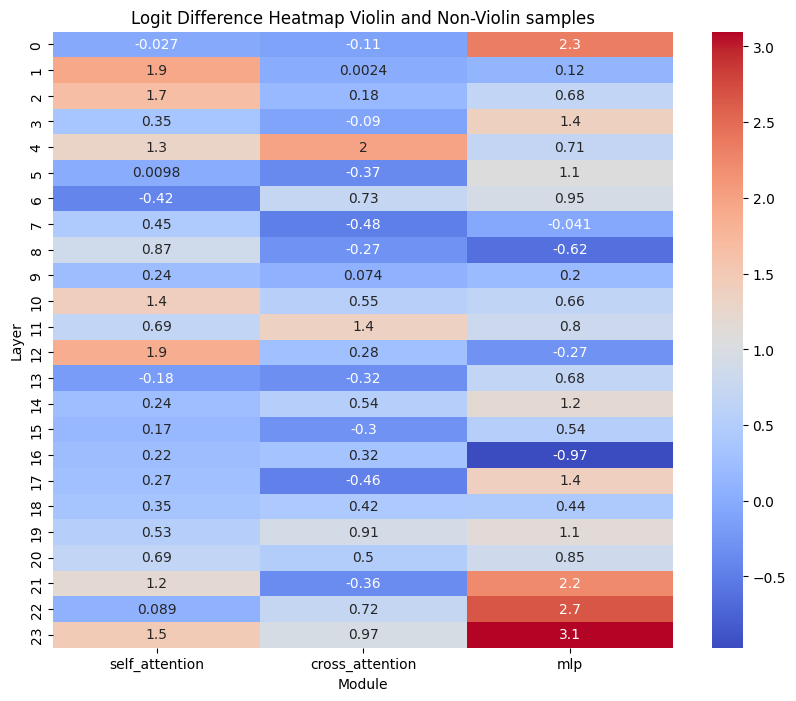

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert dictionary to dataframe
df = pd.DataFrame(mean_guitar_ablation_logits_diff)
# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df, cmap='coolwarm', annot=True)
plt.title('Logit Difference between Guitar and Non-Guitar samples')
plt.xlabel('Module')
plt.ylabel('Layer')
plt.savefig('/content/drive/My Drive/Colab Notebooks/MusicGen/Guitar_Ablation.pdf', format='pdf')
plt.show()
plt.clf()

# Convert dictionary to dataframe
df = pd.DataFrame(mean_violin_ablation_logits_diff)
# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df, cmap='coolwarm', annot=True)
plt.title('Logit Difference Heatmap Violin and Non-Violin samples')
plt.xlabel('Module')
plt.ylabel('Layer')
plt.savefig('/content/drive/My Drive/Colab Notebooks/MusicGen/Violin_Ablation.pdf', format='pdf')
plt.show()
plt.clf()

# Removing Instruments (hopefully)

In [ ]:
def reset(model, modules):
    for mod_type in modules.keys():
        for i in modules[mod_type]:
            layer = model.lm.transformer.layers[i]

            if mod_type == "self_attention":
                layer.self_attn.out_proj._forward_hooks.clear()
            elif mod_type == "cross_attention":
                layer.cross_attention.out_proj._forward_hooks.clear()
            else:
                layer.linear2._forward_hooks.clear()

In [ ]:
import numpy as np
guitar_example = ['320kbps 48khz classic reggae track with an electronic guitar solo']

torch.manual_seed(42)
wav_original_guitar = model.generate(guitar_example)[0]

logits = classifier(wav_original_guitar)
guitar_logits = logits.squeeze()[140].item()
print(round(guitar_logits, 2),'---', guitar_example[0])
display_audio(wav_original_guitar, 32_000)

guitar_logits = logits.squeeze()[191].item()
print(round(guitar_logits, 2),'---', guitar_example[0])

-0.81 --- 320kbps 48khz classic reggae track with an electronic guitar solo


-6.05 --- 320kbps 48khz classic reggae track with an electronic guitar solo


In [ ]:
removal_example_violin = ["A crisp violin melody on a lofi beat"]

torch.manual_seed(42)
wav_original_violin = model.generate(removal_example_violin)[0]

logits = classifier(wav_original_violin)
violin_logits = logits.squeeze()[191].item()
print(round(violin_logits, 2),'---', removal_example_violin[0])
display_audio(wav_original_violin, 32_000)

-2.14 --- A crisp violin melody on a lofi beat


In [ ]:
#guitar_modules = {'self_attention': [1], 'cross_attention': [], 'mlp': [0, 3, 21, 23]}
violin_imputed_modules = {'self_attention': [1], 'cross_attention': [], 'mlp': []}
violin_modules = {'self_attention': [], 'cross_attention': [4], 'mlp': []}

reset(model, violin_imputed_modules)
reset(model, violin_modules)

def remove_instrument(model, classifier, description, modules, mean_activations_non_instrument, instrument_ids):
    for mod_type in modules.keys():
        for i in modules[mod_type]:
            layer = model.lm.transformer.layers[i]

            hook_fn = partial(inject_activation_hook_fn, ActivationIterator(mean_activations_non_instrument[mod_type][i]))

            if mod_type == "self_attention":
                layer.self_attn.out_proj.register_forward_hook(hook_fn)
            elif mod_type == "cross_attention":
                layer.cross_attention.out_proj.register_forward_hook(hook_fn)
            else:
                layer.linear2.register_forward_hook(hook_fn)

    torch.manual_seed(42)
    r_removed = model.generate([description])[0]
    logits_removed = classifier(r_removed)
    class_logits = []
    for class_id in instrument_ids:
        class_logits.append(logits_removed.squeeze()[class_id].item())

    for mod_type in modules.keys():
        for i in modules[mod_type]:
            layer = model.lm.transformer.layers[i]

            if mod_type == "self_attention":
                layer.self_attn.out_proj._forward_hooks.clear()
            elif mod_type == "cross_attention":
                layer.cross_attention.out_proj._forward_hooks.clear()
            else:
                layer.linear2._forward_hooks.clear()

    return r_removed, class_logits


violin_imputed_wav, violin_imputed_logits = remove_instrument(model, classifier, guitar_example[0], violin_imputed_modules, activations_violin[3], [140, 191])
violin_removed_wav, violin_removed_logits = remove_instrument(model, classifier, removal_example_violin[0], violin_modules, mean_activations_non_violin, [191])

print(violin_imputed_logits)
display_audio(violin_imputed_wav, 32_000)

print(violin_removed_logits)
display_audio(violin_removed_wav, 32_000)

[-1.9102725982666016, -1.368868350982666]


[-5.792545795440674]
